# カテゴリ値を含むデータでのLightGBMを使った分析

### データ
[Adult Data Set](https://archive.ics.uci.edu/ml/datasets/adult) \
[Adult Census Income](https://www.kaggle.com/uciml/adult-census-income) \
[Adult income dataset](https://www.kaggle.com/wenruliu/adult-income-dataset/version/2)

### 参考
[lightgbmで二値分類の一連の流れをしたメモ](https://qiita.com/d_desuyon/items/807e01311ad08570ee78) \
[【初心者向け】特徴量重要度の算出 (LightGBM) 【Python】【機械学習】](https://mathmatical22.xyz/2020/04/12/%E3%80%90%E5%88%9D%E5%BF%83%E8%80%85%E5%90%91%E3%81%91%E3%80%91%E7%89%B9%E5%BE%B4%E9%87%8F%E9%87%8D%E8%A6%81%E5%BA%A6%E3%81%AE%E7%AE%97%E5%87%BA-lightgbm-%E3%80%90python%E3%80%91%E3%80%90%E6%A9%9F/) \
[LightGBMのCategorical Featureによって精度が向上するか？](https://qiita.com/sinchir0/items/b038757e578b790ec96a) \
[Pythonでしか描けない美しいデシジョンツリー（決定木）をlightGBMでも描こう！](https://qiita.com/hima2b4/items/b356e688ebdabc393da8) \
[LightGBM/XGBoostのtree構造可視化メモ](https://qiita.com/dyamaguc/items/70d4ce3548d49a6256fa) \
[Category Encodersでカテゴリ特徴量をストレスなく変換する](https://qiita.com/Hyperion13fleet/items/afa49a84bd5db65ffc31) \
[カテゴリ変数系特徴量の前処理(scikit-learnとcategory_encoders)](https://qiita.com/FukuharaYohei/items/06cc7b1c5eb124db6cdf)

In [1]:
!python -V

Python 3.8.8


In [2]:
!python -m pip --version

pip 21.3.1 from /opt/conda/lib/python3.8/site-packages/pip (python 3.8)


In [3]:
!python -m pip list

Package                       Version
----------------------------- -------------------
alembic                       1.6.0
anyio                         2.2.0
argon2-cffi                   20.1.0
async-generator               1.10
attrs                         20.3.0
autopage                      0.5.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
bleach                        3.3.0
blinker                       1.4
brotlipy                      0.7.0
category-encoders             2.3.0
certifi                       2020.12.5
certipy                       0.1.3
cffi                          1.14.5
chardet                       4.0.0
cliff                         3.10.0
cloudpickle                   2.0.0
cmaes                         0.8.2
cmd2                          2.3.3
colorlog                      6.6.0
colour                        0.1.5
conda                         4.10.0
conda-package-handling        1.7.3
crypto

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, auc, roc_curve, precision_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('adult.csv')

In [6]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [8]:
columns_cat = [
    'workclass',
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'gender',
    'native-country',
    #'income',
]

In [9]:
{cat:'category' for cat in columns_cat}

{'workclass': 'category',
 'education': 'category',
 'marital-status': 'category',
 'occupation': 'category',
 'relationship': 'category',
 'race': 'category',
 'gender': 'category',
 'native-country': 'category'}

In [10]:
df = df.astype({cat:'category' for cat in columns_cat})

In [11]:
for cat in columns_cat:
    print(cat, df[cat].cat.categories)

workclass Index(['?', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private',
       'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay'],
      dtype='object')
education Index(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
       'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
       'Masters', 'Preschool', 'Prof-school', 'Some-college'],
      dtype='object')
marital-status Index(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
       'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
      dtype='object')
occupation Index(['?', 'Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial',
       'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct',
       'Other-service', 'Priv-house-serv', 'Prof-specialty', 'Protective-serv',
       'Sales', 'Tech-support', 'Transport-moving'],
      dtype='object')
relationship Index(['Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried',
       'Wife']

In [12]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [13]:
income_map = {'<=50K':0, '>50K':1}
df['income'] = df['income'].map(income_map).astype(int)

In [14]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,0
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,1
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,0
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              48842 non-null  int64   
 1   workclass        48842 non-null  category
 2   fnlwgt           48842 non-null  int64   
 3   education        48842 non-null  category
 4   educational-num  48842 non-null  int64   
 5   marital-status   48842 non-null  category
 6   occupation       48842 non-null  category
 7   relationship     48842 non-null  category
 8   race             48842 non-null  category
 9   gender           48842 non-null  category
 10  capital-gain     48842 non-null  int64   
 11  capital-loss     48842 non-null  int64   
 12  hours-per-week   48842 non-null  int64   
 13  native-country   48842 non-null  category
 14  income           48842 non-null  int64   
dtypes: category(8), int64(7)
memory usage: 3.0 MB


In [16]:
#df['workclass'] = df['workclass'].replace('?',np.nan)
#df['occupation'] = df['occupation'].replace('?',np.nan)
#df['native-country'] = df['native-country'].replace('?',np.nan)
df = df.applymap(lambda d: np.nan if d=="?" else d)

In [17]:
df.isnull().sum(axis=0)

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [18]:
df = df.dropna(axis=0)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.5+ MB


In [20]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,1
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,0
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,0
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,1
11,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,0


In [21]:
#!pip install category_encoders
import category_encoders as ce

In [22]:
# One-hot Encodingしたい列をリストで指定
ce_ohe = ce.OneHotEncoder(cols=columns_cat, handle_unknown='impute')

In [23]:
# DataFrameを渡してOne-hot Encodingを適用
df = ce_ohe.fit_transform(df)
df.head(10)

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,fnlwgt,education_1,...,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40,native-country_41,income
0,25,1,0,0,0,0,0,0,226802,1,...,0,0,0,0,0,0,0,0,0,0
1,38,1,0,0,0,0,0,0,89814,0,...,0,0,0,0,0,0,0,0,0,0
2,28,0,1,0,0,0,0,0,336951,0,...,0,0,0,0,0,0,0,0,0,1
3,44,1,0,0,0,0,0,0,160323,0,...,0,0,0,0,0,0,0,0,0,1
5,34,1,0,0,0,0,0,0,198693,0,...,0,0,0,0,0,0,0,0,0,0
7,63,0,0,1,0,0,0,0,104626,0,...,0,0,0,0,0,0,0,0,0,1
8,24,1,0,0,0,0,0,0,369667,0,...,0,0,0,0,0,0,0,0,0,0
9,55,1,0,0,0,0,0,0,104996,0,...,0,0,0,0,0,0,0,0,0,0
10,65,1,0,0,0,0,0,0,184454,0,...,0,0,0,0,0,0,0,0,0,1
11,36,0,0,0,1,0,0,0,212465,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Columns: 105 entries, age to income
dtypes: int64(105)
memory usage: 36.6 MB


In [25]:
# 変換前：文字列と変換後：数値の対応関係を確認
ce_ohe.category_mapping

[{'col': 'workclass',
  'mapping': Private             1
  Local-gov           2
  Self-emp-not-inc    3
  Federal-gov         4
  State-gov           5
  Self-emp-inc        6
  Without-pay         7
  NaN                -2
  dtype: int64,
  'data_type': dtype('O')},
 {'col': 'education',
  'mapping': 11th             1
  HS-grad          2
  Assoc-acdm       3
  Some-college     4
  10th             5
  Prof-school      6
  7th-8th          7
  Bachelors        8
  Masters          9
  5th-6th         10
  Assoc-voc       11
  9th             12
  Doctorate       13
  12th            14
  1st-4th         15
  Preschool       16
  NaN             -2
  dtype: int64,
  'data_type': dtype('O')},
 {'col': 'marital-status',
  'mapping': Never-married            1
  Married-civ-spouse       2
  Widowed                  3
  Separated                4
  Divorced                 5
  Married-spouse-absent    6
  Married-AF-spouse        7
  NaN                     -2
  dtype: int64,
  'data_typ

In [26]:
import csv
df.to_csv('adult_cat2one.csv', index=False, header=True, encoding='UTF-8', sep=',', quoting=csv.QUOTE_ALL)

In [27]:
# 不要カラムの削除と並べ替え
'''
df = df[["age",
         "workclass",
         #"fnlwgt",
         "education",
         "educational-num",
         "marital-status",
         "occupation",
         "relationship",
         "race",
         "gender",
         "capital-gain",
         "capital-loss",
         "hours-per-week",
         "native-country",
         "income",]]
'''
df = df.drop(["fnlwgt"], axis=1)
df.head(10)

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40,native-country_41,income
0,25,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,38,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,28,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,44,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,34,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,63,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,24,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,55,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,65,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
11,36,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
X = df.drop(['income'], axis=1)
y = df['income']

#Creation of Train and Test dataset
X_train, X_test , y_train, y_test  = train_test_split(X      , y      , test_size=0.2, shuffle=False)

#Creation of Train and validation dataset
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

In [29]:
print ("Train dataset: {0}{1}".format(X_train.shape, y_train.shape))
print ("Validation dataset: {0}{1}".format(X_valid.shape, y_valid.shape))
print ("Test dataset: {0}{1}".format(X_test.shape, y_test.shape))

Train dataset: (28941, 103)(28941,)
Validation dataset: (7236, 103)(7236,)
Test dataset: (9045, 103)(9045,)


In [30]:
# データセットを生成する
lgb_train = lgb.Dataset(X_train, y_train)
lgb_valid = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

In [31]:
# LightGBM のハイパーパラメータ
params = {
    # 二値分類問題
    'objective': 'binary',
    # AUC の最大化を目指す
    'metric': 'auc',
    # Fatal の場合出力
    'verbosity': -1,
    # 乱数シード
    'seed': 31,
    # 学習率
    'learning_rate': 0.02,
}

In [32]:
# 上記のパラメータでモデルを学習する
model = lgb.train(params, lgb_train, valid_sets=lgb_valid,
                  verbose_eval=50,  # 50イテレーション毎に学習結果出力
                  num_boost_round=10000,  # 最大イテレーション回数指定
                  early_stopping_rounds=100
                 )

Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.913351
[100]	valid_0's auc: 0.917335


/opt/conda/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[150]	valid_0's auc: 0.922076
[200]	valid_0's auc: 0.924902
[250]	valid_0's auc: 0.926122
[300]	valid_0's auc: 0.92682
[350]	valid_0's auc: 0.92731
[400]	valid_0's auc: 0.9276
[450]	valid_0's auc: 0.927851
[500]	valid_0's auc: 0.928042
[550]	valid_0's auc: 0.928216
[600]	valid_0's auc: 0.928317
[650]	valid_0's auc: 0.928426
[700]	valid_0's auc: 0.928446
[750]	valid_0's auc: 0.928452
[800]	valid_0's auc: 0.928403
Early stopping, best iteration is:
[710]	valid_0's auc: 0.928479


In [33]:
# テストデータを予測する
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

AUC 0.9300045289359204


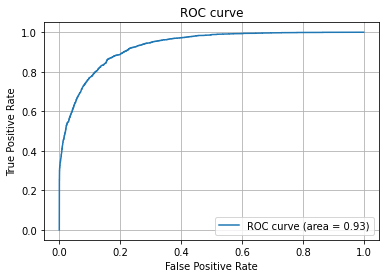

accuracy 0.8715312327252626
precision 0.7972902553413236


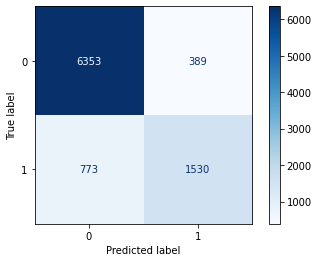

In [34]:
# AUCを計算
fpr, tpr, thresholds = roc_curve(np.asarray(y_test), y_pred)
print("AUC", auc(fpr, tpr))

# ROC曲線をプロット
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)' %auc(fpr, tpr))
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

# accuracy, precisionを計算
acc = accuracy_score(np.asarray(y_test), np.round(y_pred))
precision = precision_score(np.asarray(y_test), np.round(y_pred))
print("accuracy", acc)
print("precision", precision)

# 混同行列をプロット
y_pred = np.round(y_pred)
cm = confusion_matrix(np.asarray(y_test), np.where(y_pred < 0.5, 0, 1))
cmp = ConfusionMatrixDisplay(cm, display_labels=[0,1])
cmp.plot(cmap=plt.cm.Blues)
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

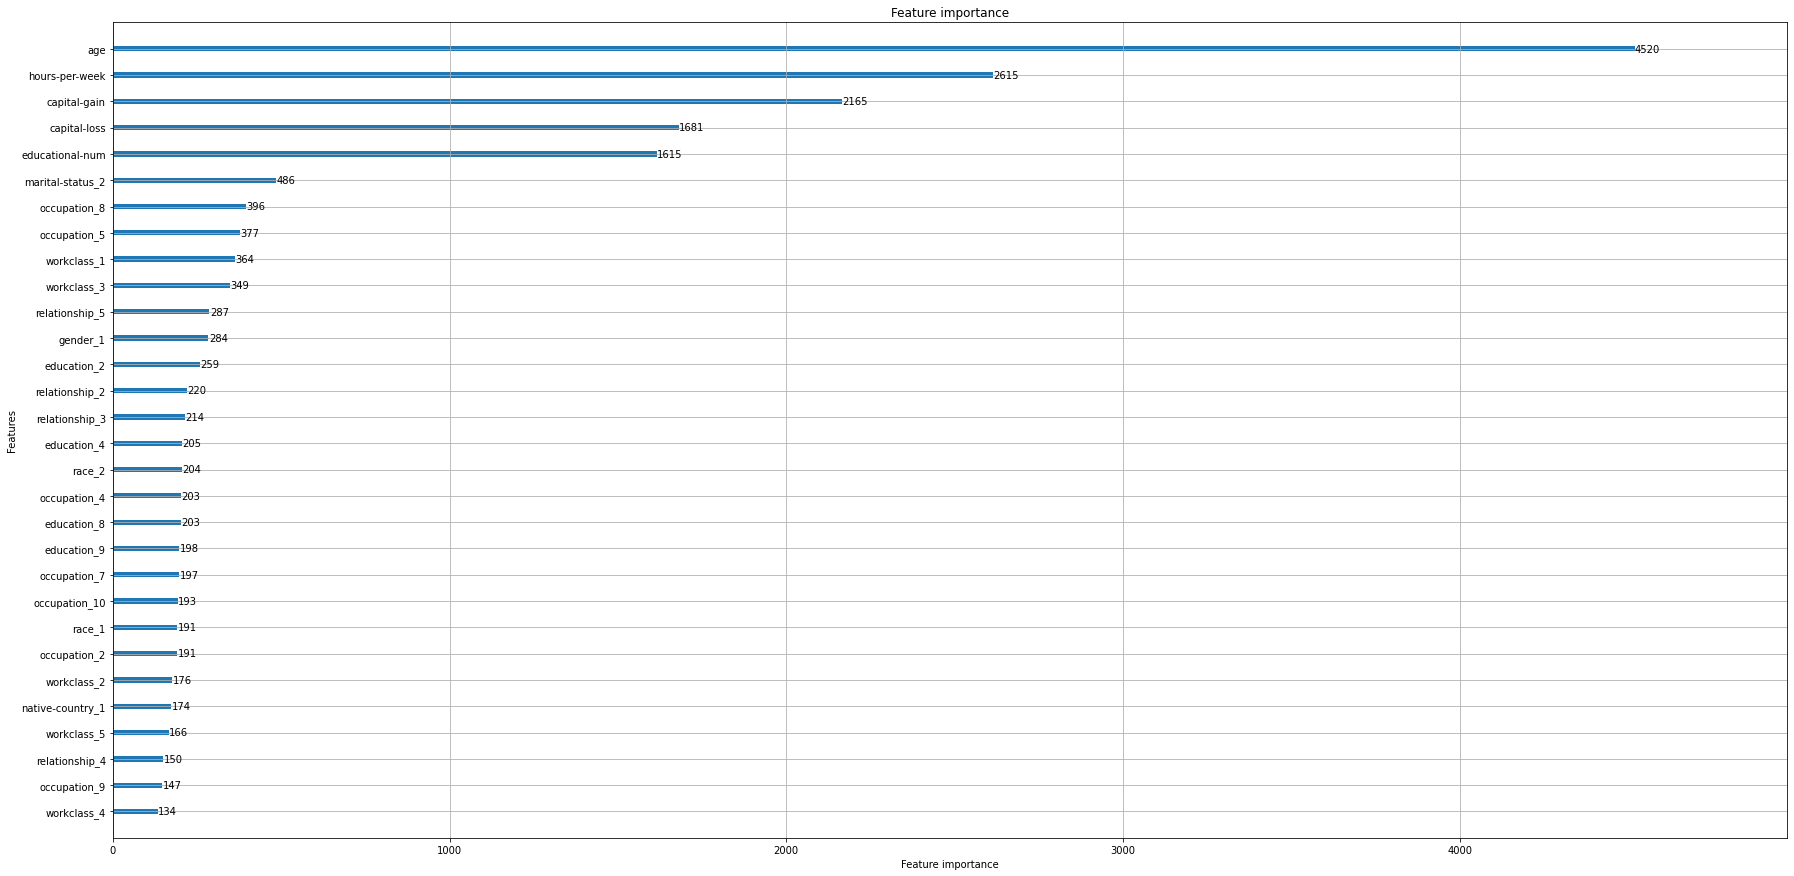

In [35]:
# 重要度としては「特徴量が分岐（ノード）の条件式で使用された回数」（＝デフォルト）
lgb.plot_importance(model, figsize=(30, 15), max_num_features=30, importance_type='split')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

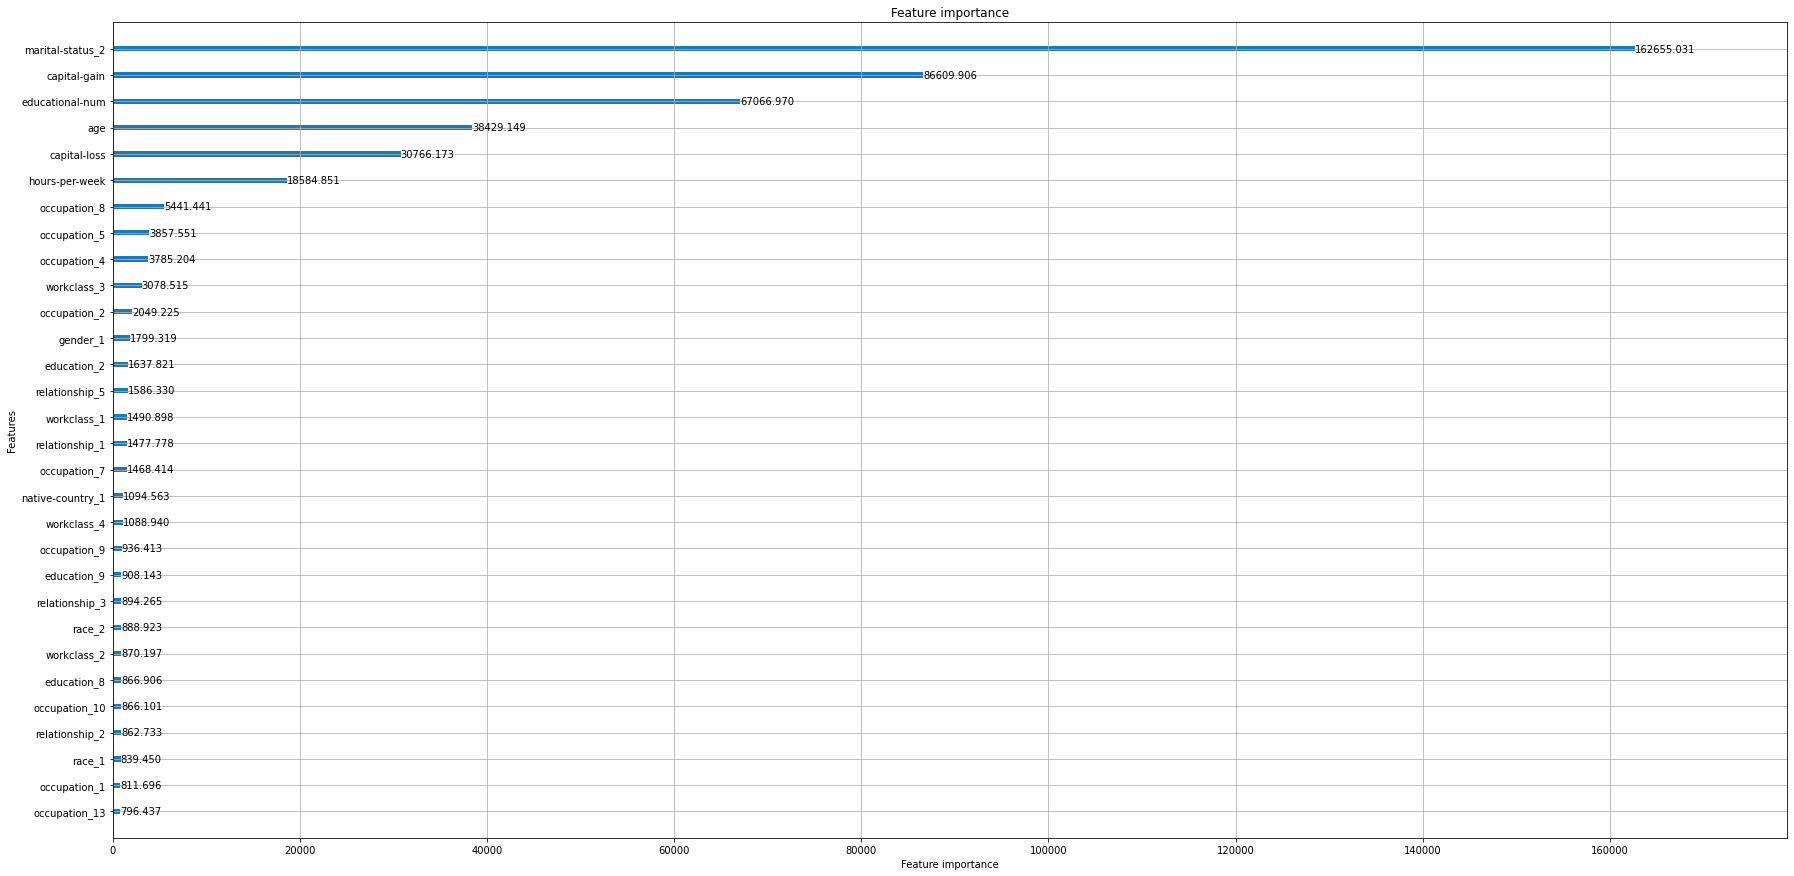

In [36]:
# 重要度としては「特徴量がある分岐（ノード）において目的関数の改善に寄与した度合い」
lgb.plot_importance(model, figsize=(30, 15), max_num_features=30, importance_type='gain')

In [37]:
# データフレームを綺麗に出力する関数
import IPython
def display(*dfs, head=True):
    for df in dfs:
        IPython.display.display(df.head() if head else df)

In [38]:
# 特徴量重要度を棒グラフでプロットする関数 
def plot_feature_importance(df): 
    n_features = len(df)                              # 特徴量数(説明変数の個数) 
    df_plot = df.sort_values('importance')            # df_importanceをプロット用に特徴量重要度を昇順ソート 
    f_importance_plot = df_plot['importance'].values  # 特徴量重要度の取得 
    plt.barh(range(n_features), f_importance_plot, align='center') 
    cols_plot = df_plot['feature'].values             # 特徴量の取得 
    plt.yticks(np.arange(n_features), cols_plot)      # x軸,y軸の値の設定
    plt.xlabel('Feature importance')                  # x軸のタイトル
    plt.ylabel('Feature')                             # y軸のタイトル

In [39]:
# 特徴量重要度の算出 (データフレームで取得)
cols = list(df.drop('income',axis=1).columns) # 特徴量名のリスト(目的変数target以外)
# 特徴量重要度の算出方法 'gain'(推奨) : トレーニングデータの損失の減少量を評価
f_importance = np.array(model.feature_importance(importance_type='gain')) # 特徴量重要度の算出 //
f_importance = f_importance / np.sum(f_importance) # 正規化(必要ない場合はコメントアウト)
df_importance = pd.DataFrame({'feature':cols, 'importance':f_importance})
df_importance = df_importance.sort_values('importance', ascending=False) # 降順ソート
display(df_importance)

,feature,importance
26,marital-status_2,0.358413
59,capital-gain,0.190846
24,educational-num,0.147783
0,age,0.084679
60,capital-loss,0.067794


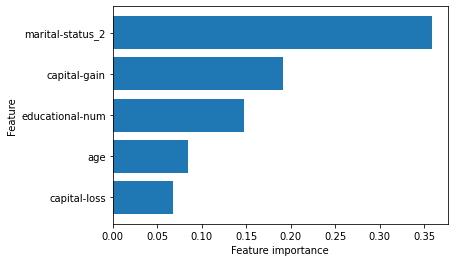

In [40]:
# 特徴量重要度の可視化
n_display = 5 # 上位10個に制限
plot_feature_importance(df_importance.iloc[:n_display,:])

In [41]:
import csv
# 決定木をDataFrameに変換
model.trees_to_dataframe().to_csv('adult_cat2one_decisiontree.csv', index=False, header=True, encoding='UTF-8', sep=',', quoting=csv.QUOTE_ALL)

In [42]:
df_tree = pd.read_csv('adult_cat2one_decisiontree.csv')

In [43]:
df_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43310 entries, 0 to 43309
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tree_index         43310 non-null  int64  
 1   node_depth         43310 non-null  int64  
 2   node_index         43310 non-null  object 
 3   left_child         21300 non-null  object 
 4   right_child        21300 non-null  object 
 5   parent_index       42600 non-null  object 
 6   split_feature      21300 non-null  object 
 7   split_gain         21300 non-null  float64
 8   threshold          21300 non-null  float64
 9   decision_type      21300 non-null  object 
 10  missing_direction  21300 non-null  object 
 11  missing_type       21300 non-null  object 
 12  value              43310 non-null  float64
 13  weight             43310 non-null  float64
 14  count              43310 non-null  int64  
dtypes: float64(4), int64(3), object(8)
memory usage: 5.0+ MB


In [44]:
df_tree.head(10)

,tree_index,node_depth,node_index,left_child,right_child,parent_index,split_feature,split_gain,threshold,decision_type,missing_direction,missing_type,value,weight,count
0,0,1,0-S0,0-S2,0-S1,NaN,marital-status_2,5762.549805,1.000000e-35,<=,left,None,-1.119970,0.000000,28941
1,0,2,0-S2,0-S8,0-L3,0-S0,capital-gain,1273.199951,7.055500e+03,<=,left,None,-1.139310,2868.460000,15464
2,0,3,0-S8,0-S13,0-S21,0-S2,educational-num,214.085007,1.350000e+01,<=,left,None,-1.141130,2815.970000,15181
3,0,4,0-S13,0-S16,0-L14,0-S8,capital-loss,103.939003,2.384500e+03,<=,left,None,-1.142480,2655.520000,14316
4,0,5,0-S16,0-L0,0-S19,0-S13,education_8,68.686798,1.000000e-35,<=,left,None,-1.142670,2649.580000,14284
5,0,6,0-L0,NaN,NaN,0-S16,NaN,NaN,NaN,NaN,NaN,NaN,-1.144069,2229.626127,12020
6,0,6,0-S19,0-L17,0-S24,0-S16,age,52.716801,2.850000e+01,<=,left,None,-1.135250,419.956000,2264
7,0,7,0-L17,NaN,NaN,0-S19,NaN,NaN,NaN,NaN,NaN,NaN,-1.143975,166.943720,900
8,0,7,0-S24,0-L20,0-L25,0-S19,hours-per-week,38.542900,4.250000e+01,<=,left,None,-1.129500,253.012000,1364
9,0,8,0-L20,NaN,NaN,0-S24,NaN,NaN,NaN,NaN,NaN,NaN,-1.135257,163.790339,883


In [45]:
len(set(df_tree['tree_index'].to_list()))

710